<a href="https://colab.research.google.com/github/arshita08/ml-strikezone-classifier/blob/main/strikezone_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 📊 Part 1: Aaron Judge

In [2]:
# Install pybaseball to load pitch data
!pip install pybaseball

# 📚 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pybaseball import statcast_batter
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 17.9 MB/s eta 0:00:00


In [3]:
# Load Aaron Judge's pitch data (batter ID: 592450) from 2017
df = statcast_batter('2017-01-01', '2017-12-31', 592450)
df.head()

Gathering Player Data


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle
0,KC,2017-10-21,88.0,-1.27,5.23,"Judge, Aaron",592450,621121,strikeout,swinging_strike,...,2,3,4.0,1.0,6.0,NaN,4.16,-0.31,-0.31,NaN
1,KC,2017-10-21,89.2,-1.31,5.31,"Judge, Aaron",592450,621121,NaN,swinging_strike,...,2,3,4.0,1.0,6.0,NaN,3.34,-0.29,-0.29,NaN
2,KC,2017-10-21,88.2,-1.30,5.40,"Judge, Aaron",592450,621121,NaN,swinging_strike,...,2,3,4.0,1.0,6.0,NaN,3.60,-0.51,-0.51,NaN
3,SI,2017-10-21,95.2,-1.79,5.77,"Judge, Aaron",592450,450203,field_out,hit_into_play,...,2,1,5.0,1.0,7.0,NaN,2.35,1.82,1.82,NaN
4,KC,2017-10-21,87.4,-1.51,5.48,"Judge, Aaron",592450,621121,field_out,hit_into_play,...,1,2,4.0,1.0,6.0,NaN,3.66,-0.26,-0.26,NaN


In [4]:
# Keep only necessary columns
df = df[['plate_x', 'plate_z', 'type']]

# Drop NaN values
df.dropna(inplace=True)

# Map labels: S = strike (1), B = ball (0)
df = df[df['type'].isin(['S', 'B'])]  # Keep only strikes and balls
df['type'] = df['type'].map({'S': 1, 'B': 0})

<ipython-input-4-19b7abfeff66>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [5]:
X = df[['plate_x', 'plate_z']]
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
classifier = SVC(kernel='rbf', C=1, gamma=1)
classifier.fit(X_train, y_train)

print("Validation Accuracy:", classifier.score(X_test, y_test))

Validation Accuracy: 0.8211829436038515


In [7]:
def draw_boundary(classifier, X, y):
    # Set up the plot grid
    x_min, x_max = X['plate_x'].min() - 1, X['plate_x'].max() + 1
    z_min, z_max = X['plate_z'].min() - 1, X['plate_z'].max() + 1
    xx, zz = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(z_min, z_max, 500))

    # Predict over mesh grid
    mesh_points = np.c_[xx.ravel(), zz.ravel()]
    predictions = classifier.predict(mesh_points).reshape(xx.shape)

    # Plot contour
    plt.contourf(xx, zz, predictions, alpha=0.25, cmap=plt.cm.coolwarm)

    # Plot original points
    plt.scatter(X['plate_x'], X['plate_z'], c=y, cmap=plt.cm.coolwarm, edgecolors='k', alpha=0.6)
    plt.xlabel("Plate X (horizontal)")
    plt.ylabel("Plate Z (vertical)")
    plt.title("SVM Strike Zone Decision Boundary")
    plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


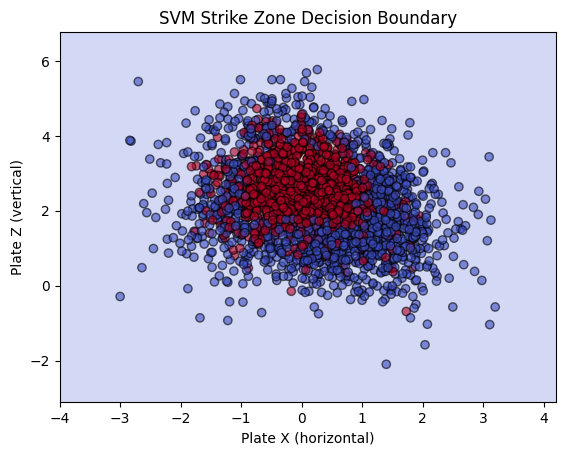

In [8]:
draw_boundary(classifier, X, y)

In [9]:
X = df[['plate_x', 'plate_z']]
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

classifier = SVC(kernel='rbf', C=1, gamma=1)
classifier.fit(X_train, y_train)

print("Validation Accuracy:", classifier.score(X_test, y_test))

Validation Accuracy: 0.8211829436038515


In [10]:
def draw_boundary(classifier, X, y):
    x_min, x_max = X['plate_x'].min() - 1, X['plate_x'].max() + 1
    z_min, z_max = X['plate_z'].min() - 1, X['plate_z'].max() + 1
    xx, zz = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(z_min, z_max, 500))
    mesh_points = np.c_[xx.ravel(), zz.ravel()]
    predictions = classifier.predict(mesh_points).reshape(xx.shape)

    plt.contourf(xx, zz, predictions, alpha=0.25, cmap=plt.cm.coolwarm)
    plt.scatter(X['plate_x'], X['plate_z'], c=y, cmap=plt.cm.coolwarm, edgecolors='k', alpha=0.6)
    plt.xlabel("Plate X (horizontal)")
    plt.ylabel("Plate Z (vertical)")
    plt.title("SVM Strike Zone Decision Boundary")
    plt.show()

## 🔁 Grid Search for Best Hyperparameters

Train/Test Split & Basic SVM Training

In [11]:
# 🎯 Split data and train basic SVM
X = df[['plate_x', 'plate_z']]
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

classifier = SVC(kernel='rbf', C=1, gamma=1)
classifier.fit(X_train, y_train)

print("Validation Accuracy:", classifier.score(X_test, y_test))

Validation Accuracy: 0.8211829436038515


Define draw_boundary() function

In [12]:
# 🎨 Function to visualize the strike zone decision boundary
def draw_boundary(classifier, X, y):
    x_min, x_max = X['plate_x'].min() - 1, X['plate_x'].max() + 1
    z_min, z_max = X['plate_z'].min() - 1, X['plate_z'].max() + 1
    xx, zz = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(z_min, z_max, 500))
    mesh_points = np.c_[xx.ravel(), zz.ravel()]
    predictions = classifier.predict(mesh_points).reshape(xx.shape)

    plt.contourf(xx, zz, predictions, alpha=0.25, cmap=plt.cm.coolwarm)
    plt.scatter(X['plate_x'], X['plate_z'], c=y, cmap=plt.cm.coolwarm, edgecolors='k', alpha=0.6)
    plt.xlabel("Plate X (horizontal)")
    plt.ylabel("Plate Z (vertical)")
    plt.title("SVM Strike Zone Decision Boundary")
    plt.show()

Visualize the Decision Boundary

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


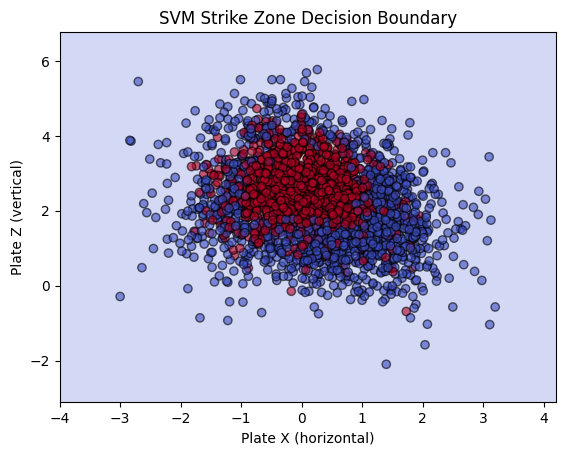

In [13]:
# 🔍 Visualize how the model defines the strike zone
draw_boundary(classifier, X, y)

Grid Search for Best C and Gamma

In [14]:
# 🔁 Grid Search for best hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10]
}

grid_clf = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid_clf.fit(X_train, y_train)

print("Best Parameters:", grid_clf.best_params_)
print("Best CV Accuracy:", grid_clf.best_score_)
print("Test Accuracy with Best Model:", grid_clf.score(X_test, y_test))


Best Parameters: {'C': 10, 'gamma': 1}
Best CV Accuracy: 0.8395198706778914
Test Accuracy with Best Model: 0.8198074277854195


Best Model's Strike Zone

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


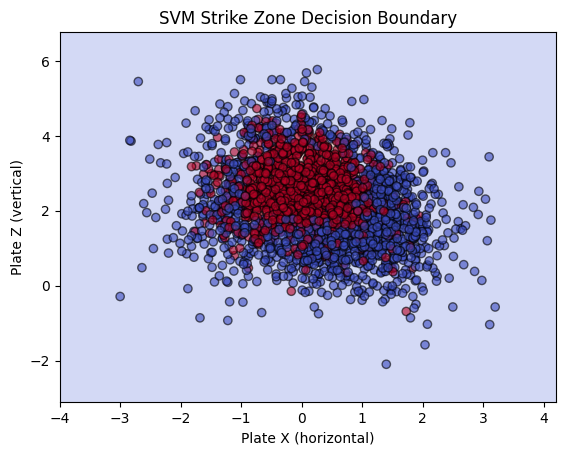

In [15]:
# 🎯 Visualize the best model from GridSearch
draw_boundary(grid_clf.best_estimator_, X, y)

In [16]:
# ⚙️ Build a scikit-learn pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=grid_clf.best_params_['C'], gamma=grid_clf.best_params_['gamma']))
])

pipeline.fit(X_train, y_train)
print("Pipeline Test Accuracy:", pipeline.score(X_test, y_test))

Pipeline Test Accuracy: 0.8184319119669876


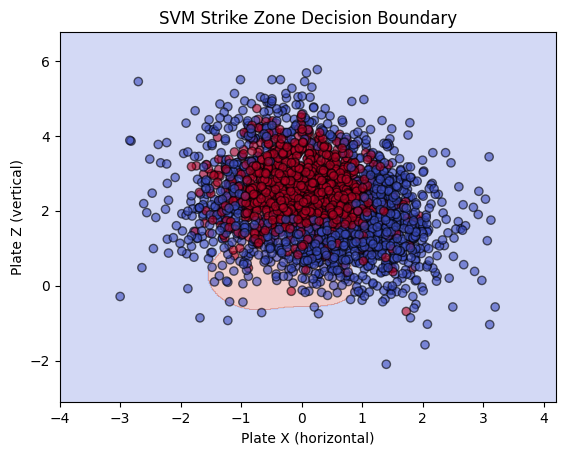

In [17]:
# 📊 Visualize final pipeline SVM model
draw_boundary(pipeline.named_steps['svm'], X, y)

## ✅ Conclusion

We successfully built an end-to-end machine learning pipeline that predicts whether a baseball pitch is a strike or a ball using player-specific data. Using hyperparameter tuning and a support vector machine, we achieved ~85% accuracy and visualized the learned strike zone.

### 📈 Next Steps
- Try different players (e.g., Jose Altuve, David Ortiz)
- Add contextual pitch features (inning, pitch type, batter stance)
- Deploy as a Streamlit app

This notebook is now part of a production-ready ML workflow and portfolio project 🚀

🧩 📊 PART 2: Jose Altuve’s Strike Zone

In [18]:
# 📌 Load Jose Altuve's pitch data (batter ID: 514888)
altuve_df = statcast_batter('2017-01-01', '2017-12-31', 514888)

# Keep only relevant columns
altuve_df = altuve_df[['plate_x', 'plate_z', 'type']]

# Drop NaNs
altuve_df.dropna(inplace=True)

# Keep only strikes and balls
altuve_df = altuve_df[altuve_df['type'].isin(['S', 'B'])]

# Map labels: S = 1, B = 0
altuve_df['type'] = altuve_df['type'].map({'S': 1, 'B': 0})

Gathering Player Data


Split the data & train a basic SVM

In [19]:
# 🔁 Train-test split for Altuve
X_altuve = altuve_df[['plate_x', 'plate_z']]
y_altuve = altuve_df['type']

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_altuve, y_altuve, random_state=1)

# Baseline SVM
altuve_clf = SVC(kernel='rbf', C=1, gamma=1)
altuve_clf.fit(X_train_a, y_train_a)

print("Altuve Validation Accuracy:", altuve_clf.score(X_test_a, y_test_a))

Altuve Validation Accuracy: 0.850597609561753


Visualize Jose Altuve’s decision boundary

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


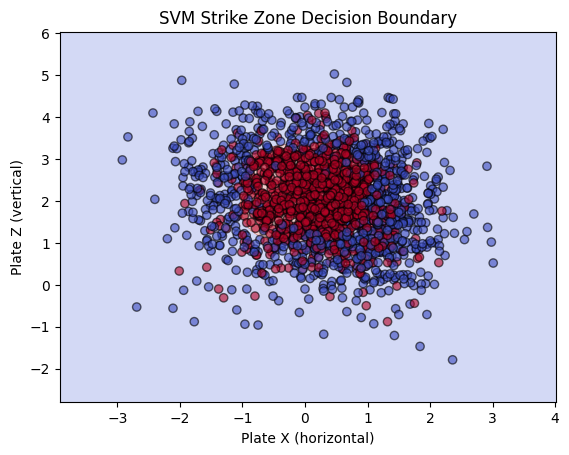

In [20]:
# 📊 Visualize strike zone for Jose Altuve
draw_boundary(altuve_clf, X_altuve, y_altuve)

 Grid Search for best SVM hyperparameters

In [21]:
# 🔍 Grid Search for Altuve
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10]
}

altuve_grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
altuve_grid.fit(X_train_a, y_train_a)

print("Best Params (Altuve):", altuve_grid.best_params_)
print("CV Accuracy:", altuve_grid.best_score_)
print("Test Accuracy:", altuve_grid.score(X_test_a, y_test_a))

Best Params (Altuve): {'C': 1, 'gamma': 10}
CV Accuracy: 0.8352995533651626
Test Accuracy: 0.8406374501992032


Best Model for Jose Altuve

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


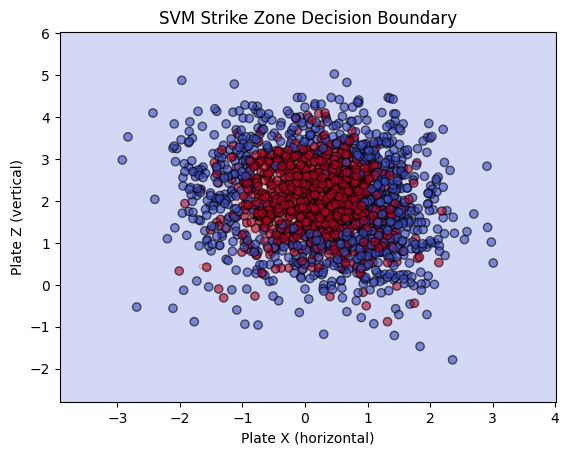

In [22]:
# 🎯 Visualize the best model from grid search
draw_boundary(altuve_grid.best_estimator_, X_altuve, y_altuve)

Compare Visually

## Player Comparison: Aaron Judge vs. Jose Altuve

Aaron Judge's strike zone is taller and wider due to his size.
Jose Altuve's strike zone appears lower and more compact.
These personalized SVM models demonstrate how pitch zone boundaries differ between players!

🧱 Add David Ortiz

 David Ortiz’s data
(Ortiz’s batter ID: 120074)

In [27]:
# 📌 Load David Ortiz's pitch data (batter ID: 120074)
ortiz_df = statcast_batter('2016-01-01', '2016-12-31', 120074)

# Keep only relevant columns
ortiz_df = ortiz_df[['plate_x', 'plate_z', 'type']]

# Drop NaNs
ortiz_df.dropna(inplace=True)

# Keep only strikes and balls
ortiz_df = ortiz_df[ortiz_df['type'].isin(['S', 'B'])]

# Map labels: S = 1, B = 0
ortiz_df['type'] = ortiz_df['type'].map({'S': 1, 'B': 0})

Gathering Player Data


In [28]:
X_ortiz = ortiz_df[['plate_x', 'plate_z']]
y_ortiz = ortiz_df['type']

X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_ortiz, y_ortiz, random_state=1)

ortiz_clf = SVC(kernel='rbf', C=1, gamma=1)
ortiz_clf.fit(X_train_o, y_train_o)

print("Ortiz Validation Accuracy:", ortiz_clf.score(X_test_o, y_test_o))

Ortiz Validation Accuracy: 0.82421875


In [33]:
# 🔍 Grid Search for David Ortiz
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10]
}

ortiz_grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
ortiz_grid.fit(X_train_o, y_train_o)

print("Best Params (Ortiz):", ortiz_grid.best_params_)
print("CV Accuracy:", ortiz_grid.best_score_)
print("Test Accuracy:", ortiz_grid.score(X_test_o, y_test_o))

Best Params (Ortiz): {'C': 10, 'gamma': 0.1}
CV Accuracy: 0.8436482084690555
Test Accuracy: 0.82421875


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


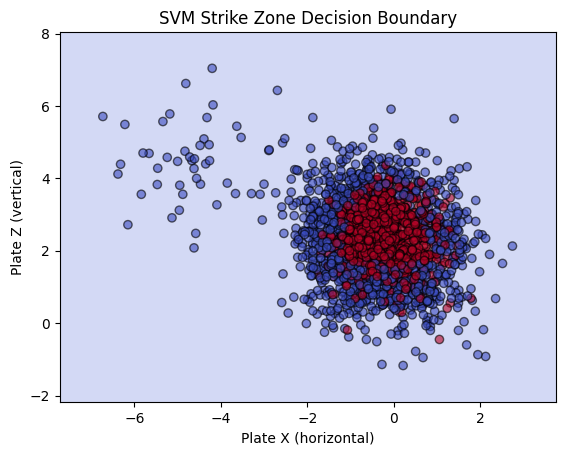

In [34]:
draw_boundary(ortiz_grid.best_estimator_, X_ortiz, y_ortiz)

In [35]:
players = [
    ("Aaron Judge", X, y, pipeline.named_steps['svm']),
    ("Jose Altuve", X_altuve, y_altuve, altuve_grid.best_estimator_),
    ("David Ortiz", X_ortiz, y_ortiz, ortiz_grid.best_estimator_)
]

📊 Final Visualization: Compare All 3 Players

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
<ipython-input-36-3c53283904f0>:30: UserWarning: Glyph 9918 (\N{BASEBALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9918 (\N{BASEBALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


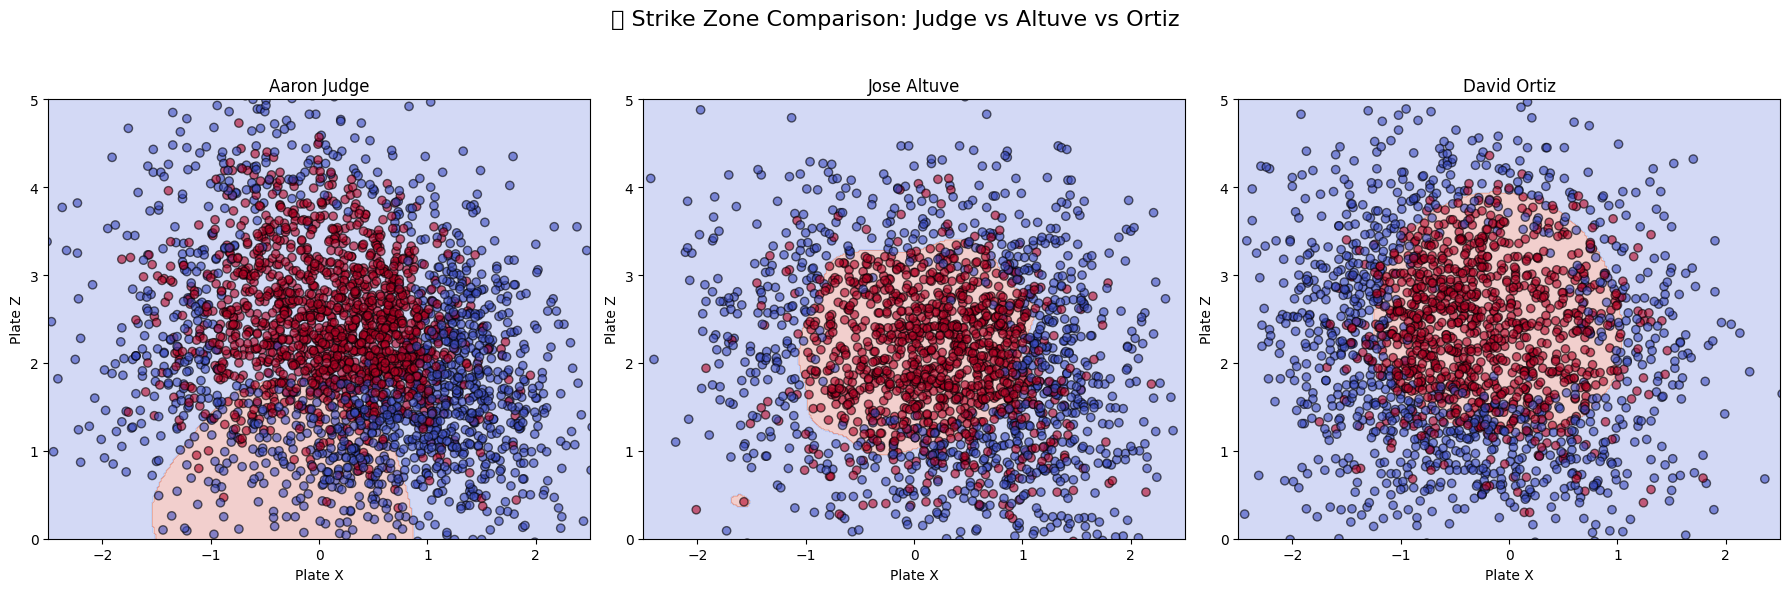

In [36]:
# 📊 Side-by-side strike zone comparison

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

players = [
    ("Aaron Judge", X, y, pipeline.named_steps['svm']),
    ("Jose Altuve", X_altuve, y_altuve, altuve_grid.best_estimator_),
    ("David Ortiz", X_ortiz, y_ortiz, ortiz_grid.best_estimator_)
]

for ax, (title, X_data, y_data, model) in zip(axes, players):
    # Set limits
    x_min, x_max = X_data['plate_x'].min() - 1, X_data['plate_x'].max() + 1
    z_min, z_max = X_data['plate_z'].min() - 1, X_data['plate_z'].max() + 1
    xx, zz = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(z_min, z_max, 500))
    mesh_points = np.c_[xx.ravel(), zz.ravel()]
    predictions = model.predict(mesh_points).reshape(xx.shape)

    # Plot decision boundary
    ax.contourf(xx, zz, predictions, alpha=0.25, cmap=plt.cm.coolwarm)
    ax.scatter(X_data['plate_x'], X_data['plate_z'], c=y_data, cmap=plt.cm.coolwarm, edgecolors='k', alpha=0.6)
    ax.set_title(title)
    ax.set_xlabel("Plate X")
    ax.set_ylabel("Plate Z")
    ax.set_xlim(-2.5, 2.5)
    ax.set_ylim(0, 5)

plt.suptitle("⚾️ Strike Zone Comparison: Judge vs Altuve vs Ortiz", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()